In [19]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as smp
import scipy as sp
from scipy.integrate import simpson, trapezoid, fixed_quad, quad

# Actividad 07: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: ______
*Métodos computacionales*

---

#1

Encuentre las integrales

$$\int_0^{\pi/4}  e^{3x}\cdot \sin(x) \, dx$$

---

$$\int_e^{1+e} \frac{1}{x\ln x} \, dx$$

---

* Usando los métodos Trapezoidal y de Simpson. Evalue la convergencia en función del valor de $h$, para esto haga un gráfico logaritmico del error absoluto tomando como valor exacto el dado por `quad`.

* Luego, realice un estudio de la convergencia para `fixed_quad`.






In [67]:

''' codigo del taller con sus anotaciones para no perderme'''
def Trapecio_Compuesta(f, a, b, n):

    if n <= 0 or not isinstance(n, int):
        raise ValueError("n debe ser un entero positivo")
    if a >= b:
        raise ValueError("El límite inferior a debe ser menor que el límite superior b")
    if not callable(f):
        raise ValueError("f debe ser una función callable")
    # Calcular el ancho de los subintervalos
    h = (b - a) / n
    # Inicializar la suma de la integral
    integral = 0.5 * (f(a) + f(b)) # extremos
    # Calcular la integral usando la regla del trapecio
    for i in range(1, n):
        x_i = a + i * h # punto del subintervalo
        integral += f(x_i) # valor de la función en el punto del subintervalo
    return integral * h
    #ahora con el codigo de simpson del taller

def Simpson13_Compuesta(f, a, b, n):
    if n <= 0 or not isinstance(n, int):
        raise ValueError("n debe ser un entero positivo")
    if n % 2 == 1:
        raise ValueError("n debe ser un número par para Simpson 1/3")
    if a >= b:
        raise ValueError("El límite inferior a debe ser menor que el límite superior b")
    if not callable(f):
        raise ValueError("f debe ser una función callable")
    # Calcular el ancho de los subintervalos
    h = (b - a) / n
    # Inicializar la suma de la integral
    integral = f(a) + f(b) # extremos
    integral_pares = 0
    integral_impares = 0
    # Valores
    for i in range(1, n):
      # Calcular el punto del subintervalo
      x_i = a + i * h
      if i % 2 == 0:
        integral_pares += f(x_i)
      else:
        integral_impares += f(x_i)

    integral += 4 * integral_impares + 2 * integral_pares # valor de la función en el punto medio
    return integral * h / 3


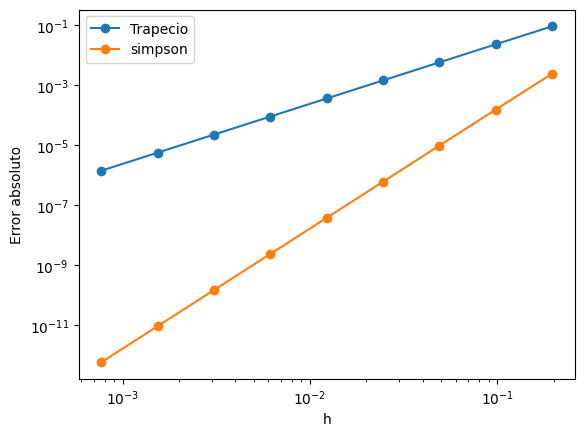

In [21]:
# mi parte del codigo

#hago listas para hacer la parte de del plot
f = lambda x: np.exp(3 * x) * np.sin(x)
a = 0
b = np.pi/4
n= 1000000
#para calcular el error creo el que es exacto

exacto = sp.integrate.quad(f,a,b)[0]

haches=[]
errores=[]
for n in [2**i for i in range(2, 11)]:# en potencias de 2 para agarrar numeros muy grandes sin tener que agarrar los que hay de por medio para que no crashee

  h= (b-a)/n # el tamaño de los intervalos h
  aproximado= Trapecio_Compuesta(f,a,b,n) # el valor aproximado de la funcion trapecio
  error= abs(exacto-aproximado) # error no hay mas
  errores.append(error) # agrego el valor del error a la lista de errrores
  haches.append(h) # agrego el valor de la h a la lista de haches
#la misma forma de calcular el error que en el trapecio

haches_simpson= []
errores_simpson= []
for n in [2**i for i in range(2, 11)]:
  h= (b-a)/n # el tamaño de los intervalos h
  aproximado= Simpson13_Compuesta(f,a,b,n) # el valor aproximado de la funcion trapecio
  error= abs(exacto-aproximado) # error no hay mas
  errores_simpson.append(error) # agrego el valor del error a la lista de errrores
  haches_simpson.append(h) # agrego el valor de la h a la lista de haches
# ploteo todo para la primera integral

plt.loglog(haches, errores,'-o', label= 'Trapecio')
plt.loglog(haches_simpson, errores_simpson,'-o', label= 'simpson')
plt.xlabel('h')
plt.ylabel('Error absoluto')
plt.legend()
plt.show()

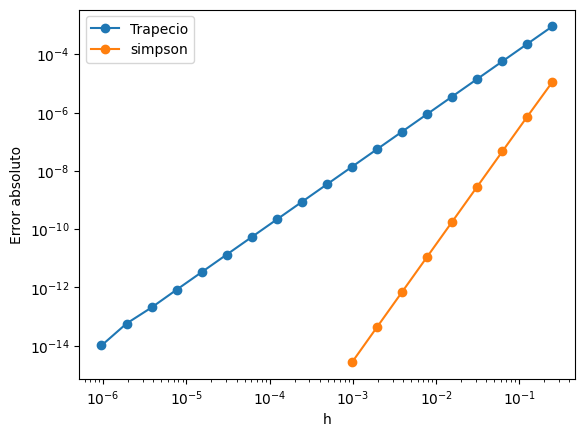

In [52]:
#segunda integral
f=lambda x:1/(x*np.log(x))
a=np.e
b=np.e + 1
exacto= sp.integrate.quad(f,a,b)[0]
haches_simpson= []
errores_simpson= []
for n in [2**i for i in range(2, 11)]:
  h= (b-a)/n
  aproximado= Simpson13_Compuesta(f,a,b,n)
  error= abs(exacto-aproximado)
  errores_simpson.append(error)
  haches_simpson.append(h)

haches=[]
errores=[]
for n in [2**i for i in range(2, 21)]:
  h= (b-a)/n
  aproximado= Trapecio_Compuesta(f,a,b,n)
  error= abs(exacto-aproximado)
  errores.append(error)
  haches.append(h)
# ploteo todo para la segunda integral
plt.loglog(haches, errores,'-o', label= 'Trapecio')
plt.loglog(haches_simpson, errores_simpson,'-o', label= 'simpson')
plt.xlabel('h')
plt.ylabel('Error absoluto')
plt.legend()
plt.show()

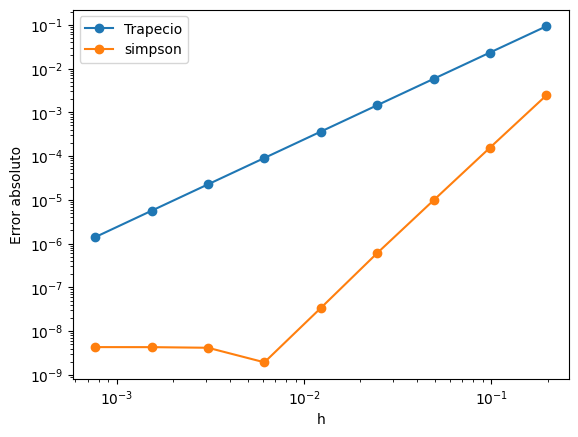

In [23]:
# con fixed quad
f = lambda x: np.exp(3 * x) * np.sin(x)
a = 0
b = np.pi/4
n= 1000000
#para calcular el error creo el que es exacto

exacto= sp.integrate.fixed_quad(f,a,b)[0]

haches=[]
errores=[]
for n in [2**i for i in range(2, 11)]:# en potencias de 2 para agarrar numeros muy grandes sin tener que agarrar los que hay de por medio para que no crashee

  h= (b-a)/n # el tamaño de los intervalos h
  aproximado= Trapecio_Compuesta(f,a,b,n) # el valor aproximado de la funcion trapecio
  error= abs(exacto-aproximado) # error no hay mas
  errores.append(error) # agrego el valor del error a la lista de errrores
  haches.append(h) # agrego el valor de la h a la lista de haches
#la misma forma de calcular el error que en el trapecio

haches_simpson= []
errores_simpson= []
for n in [2**i for i in range(2, 11)]:
  h= (b-a)/n # el tamaño de los intervalos h
  aproximado= Simpson13_Compuesta(f,a,b,n) # el valor aproximado de la funcion trapecio
  error= abs(exacto-aproximado) # error no hay mas
  errores_simpson.append(error) # agrego el valor del error a la lista de errrores
  haches_simpson.append(h) # agrego el valor de la h a la lista de haches
# ploteo todo para la primera integral

plt.loglog(haches, errores,'-o', label= 'Trapecio')
plt.loglog(haches_simpson, errores_simpson,'-o', label= 'simpson')
plt.xlabel('h')
plt.ylabel('Error absoluto')
plt.legend()
plt.show()

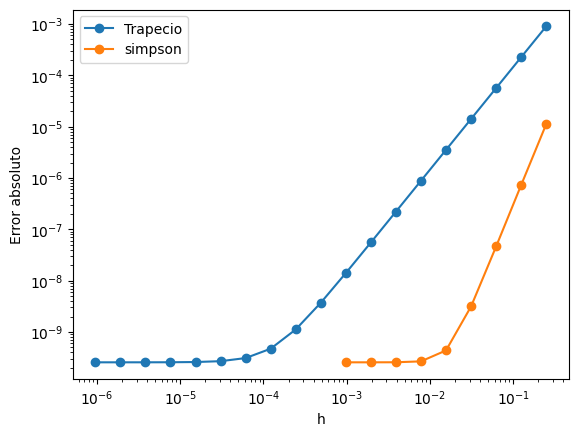

In [24]:
#segunda integral

f=lambda x:1/(x*np.log(x))
a=np.e
b=np.e + 1
exacto= sp.integrate.fixed_quad(f,a,b)[0]
haches_simpson= []
errores_simpson= []
for n in [2**i for i in range(2, 11)]:
  h= (b-a)/n
  aproximado= Simpson13_Compuesta(f,a,b,n)
  error= abs(exacto-aproximado)
  errores_simpson.append(error)
  haches_simpson.append(h)

haches=[]
errores=[]
for n in [2**i for i in range(2, 21)]:
  h= (b-a)/n
  aproximado= Trapecio_Compuesta(f,a,b,n)
  error= abs(exacto-aproximado)
  errores.append(error)
  haches.append(h)
# ploteo todo para la segunda integral
plt.loglog(haches, errores,'-o', label= 'Trapecio')
plt.loglog(haches_simpson, errores_simpson,'-o', label= 'simpson')
plt.xlabel('h')
plt.ylabel('Error absoluto')
plt.legend()
plt.show()

#2

* Resuelva la siguiente integral usando `quad`. Compare su respuesta con `tlquad`

$$
\int_0^\pi \int_0^x \int_0^{xy} \frac{1}{y}\sin\frac{z}{y}\, dz dy dx
$$

In [25]:
#otra vez hacer uso de las clases
def integral_mas_interna(y, x):
    integrando = lambda z: 1/y*np.sin(z/y)
    resultado, _ = sp.integrate.quad(integrando, 0, x*y)
    return resultado

def integral_intermedia(x):
    integrando = lambda y: integral_mas_interna(y, x)
    resultado, _ = sp.integrate.quad(integrando, 0, x)
    return resultado

resultado_triple_quad, error_triple_quad = sp.integrate.quad(integral_intermedia, 0, np.pi)
print(f'la integral es igual a {resultado_triple_quad}')
print(f'el error de la integral es {error_triple_quad}')

la integral es igual a 6.934802200544679
el error de la integral es 7.699177074265904e-14


In [31]:
f = lambda z,y,x: 1/y*np.sin(z/y)
resultado_tpl,error_tpl= sp.integrate.tplquad(f,0,np.pi,lambda x:0, lambda x: x, lambda x,y:0, lambda x,y:x*y)
print(f'la integral es igual a {resultado_tpl}')
print(f'el error de la integral es{error_tpl}')

la integral es igual a 6.934802200544679
el error de la integral es7.699177074265904e-14


In [27]:
# diferencias entre quad y tpl quad
print(f'la diferencia entre los resultados de ambos metodos es {abs(resultado_tpl-resultado_triple_quad)}')
print(f'la diferencia entre los errores de ambos metodos es {abs(error_tpl-error_triple_quad)}')

la diferencia entre los resultados de ambos metodos es 0.0
la diferencia entre los errores de ambos metodos es 0.0


In [28]:
''' el resultado de ambas dio exactamente lo mismo y los resultados no difieren de cuando los proceso en otras calculadoras los dos metodos son igual de fiables'''

' el resultado de ambas dio exactamente lo mismo y los resultados no difieren de cuando los proceso en otras calculadoras los dos metodos son igual de fiables'

#3
Usando la siguiente función:



```python
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral
```

Modifique la función `gauss_quad_standard` de forma tal que no este restringida para $[-1,1]$ sino para cualquier intervalo $[a,b]$. Luego, encuentre la integral del *punto 2*.





In [56]:
def gauss_quad_standard_2(func,a,b, n): # modifico los valores de entrada para que me resiva los limites de integración

    """
    Calcula la integral de una función en el intervalo [a, b]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - a,b: limites de integracion
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre renombrando x a xi para poder generalizarla
    xi, w = sp.special.roots_legendre(n)

    #renuevo el valor de la x en base a la generalización
    x = (b-a)*0.5 * xi + (a+b)*0.5

    # Evaluar la suma ponderada

    #cambiar la forma de la suma para generalizarla
    integral = (b-a) * 0.5 * np.sum(w * func(x))
    return integral



In [57]:
n=10000
#realizo un proceso similar al solo quad
def integral_mas_interna(y, x):
    integrando = lambda z: 1/y*np.sin(z/y)
    resultado= gauss_quad_standard_2(integrando, 0, x*y, n)
    return resultado

def integral_intermedia(x):
    integrando = lambda y: integral_mas_interna(y, x)
    resultado = gauss_quad_standard_2(integrando, 0, x, n)
    return resultado

resultado_gauss= gauss_quad_standard_2(integral_intermedia, 0, np.pi,n)

print(f'la integral es igual a {resultado_gauss}')

la integral es igual a 9.10733196633104


#4
Usando los métodos trapezoidal, Simpson y cuadratura Gaussiana encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.